In [1]:
import pandas as pd
import time
import networkx as nx

In [2]:
import sys  
reload(sys)  
sys.setdefaultencoding('utf8')

In [3]:
dfrelacionesCargos = pd.DataFrame()
dfrelacionesParticipadas= pd.DataFrame()
dfempresas= pd.DataFrame()
dfrelacionesParticipadas= pd.read_pickle('./Alberto.data/RelacionesEmpresasParticipadas')
dfwork = pd.read_pickle('./Alberto.data/NodosEmpresa')
dfrelacionesCargos = pd.read_pickle('./Alberto.data/RelacionesCargos')
dfrelacionesAccionistas = pd.read_pickle('./Alberto.data/RelacionesAccionistas')
dfrelacionesPuestos = pd.read_pickle('./Alberto.data/RelacionesPuestos')
dfeventosborme= pd.read_csv('BORMEEvents.csv')

In [4]:
dfeventosborme.head(2)

,Unnamed: 0,rowID,razon,evento,subevento,codevento,actor,fecha_publicacion,cif,nombre
0,0,6826517,SL,Nombramientos.,vicepresidente,44014,PENA RUSHTON JUAN ANTONIO,11/02/2010,B15371222,CENTRAL ELECTRODOMESTICOS NOROESTE
1,1,6826518,SL,Nombramientos.,secretario,4409,BABIO LOPEZ JESUS,11/02/2010,B15371222,CENTRAL ELECTRODOMESTICOS NOROESTE


In [5]:
dfeventosborme.evento.unique()

array(['Nombramientos.', 'Reelecciones.', 'Ceses/Dimisiones.',
       'Situaci\xc3\xb3n concursal.', 'Disoluci\xc3\xb3n.',
       'Modificaciones estatutarias.',
       'Declaraci\xc3\xb3n de unipersonalidad.', 'Revocaciones.',
       'Sociedad unipersonal.', 'Fusi\xc3\xb3n por absorci\xc3\xb3n.',
       'Declaraci\xc3\xb3n  de unipersonalidad.',
       'Articulo 378.5 del Reglamento del Registro Mercantil.',
       'Escisi\xc3\xb3n parcial.', 'Escisi\xc3\xb3n total.',
       'Otros conceptos', 'Transformaci\xc3\xb3n de sociedad.',
       'P\xc3\xa1gina web de la sociedad.'], dtype=object)

In [6]:
dfeventosborme.subevento.unique()

array(['vicepresidente', 'secretario', 'consejero', 'presidente',
       'num0concurso', 'auditor', 'apoderado0solid', 'liquidador',
       'admin0unico', 'voluntaria', 'admin0solid', 'cambio0organo0admin',
       'apoderado', 'apoderado0mancom', 'consejero0delegado',
       'admin0mancom', 'socio0unico', 'consejero0delegado0mancom',
       'representan', 'socio', 'apoderado0solid0mancom',
       'secretario0noconsej', 'vicesecretario0noconsej',
       'consejero0delegado0solid', 'vicesecretario', 'benef0absorcion',
       'no0aprobac0cuentas', 'escindidas', 'gerente', 'entidad0gestora',
       'admin0conc', 'insolvencia', 'cambio0socio0unico', 'crea0web',
       'miem0cons0rector'], dtype=object)

In [7]:
dfwork.columns

Index([u'nombre', u'CIF', u'ISIN', u'forma', u'fconst', u'Estado',
       u'fechaCambioEstado', u'Pres', u'DE', u'tipoCuentasDisponible',
       u'numEmpresasEnCorporacion', u'numparticipadas', u'codPrimarioCNAE',
       u'incidenciasJudiciales', u'reclamacionesAdministrativas',
       u'numMiembrosJuntas', u'numMiembrosJuntasDireccion',
       u'numEmpresasGrupo', u'long', u'lat', u'cotizoBolsa', u'totActivo2015',
       u'totActivo2014', u'fondosPropios2015', u'fondosPropios2014',
       u'numEmpleados2015', u'numEmpleados2015', u'netoVentas2015',
       u'netoVentas2014', u'file'],
      dtype='object')

In [8]:
dfwork.head(2)

,nombre,CIF,ISIN,forma,fconst,Estado,fechaCambioEstado,Pres,DE,tipoCuentasDisponible,...,cotizoBolsa,totActivo2015,totActivo2014,fondosPropios2015,fondosPropios2014,numEmpleados2015,numEmpleados2015,netoVentas2015,netoVentas2014,file
0,NOVAMAS2002 SL,B62893151,No cotiza en bolsa,Sociedad limitada,2002-06-17 00:00:00,Desconocido,None,None,None,No Consolidadas,...,No cotiza en bolsa,106.13797,43.45643,35.5551,-11.8354,n.d.,n.d.,n.d.,4.075,../../data/datasets/SABI/lista1/50 Lista1 empr...
1,NOVAPAPA SL,B53859765,No cotiza en bolsa,Sociedad limitada,2004-02-23 00:00:00,Desconocido,None,None,None,No Consolidadas,...,No cotiza en bolsa,372.23437,455.31208,372.234,373.415,n.d.,n.d.,n.d.,n.d.,../../data/datasets/SABI/lista1/50 Lista1 empr...


In [9]:
dfwork.columns
dfwork.fconst=dfwork.fconst.str.encode('utf-8')
dfwork.Estado.fillna('Desconocido')
dfwork.Estado=dfwork.Estado.str.encode('utf-8')
dfwork.nombre=dfwork.nombre.str.encode('utf-8')
dfwork.ISIN=dfwork.ISIN.str.encode('utf-8')
dfwork.forma=dfwork.forma.str.encode('utf-8')
dfwork.CIF=dfwork.CIF.str.encode('utf-8')


In [10]:
dfrelacionesParticipadas.head(2)

,nombre,CIF,tipoRelacion,nombre,participadaId,participadaCodPais,porcentajeDirecto,porcentajeTotal
0,NOVASERRA SA,A28940542,participada,NAVAL 77 SA,ESA84203181,ES,"49,75",n.d.
1,NOVASERRA SA,A28940542,participada,GEURCO SA,ESA28832335,ES,"46,82",n.d.


In [11]:
dfrelacionesCargos.head(2)

,nombre,CIF,tipoRelacion,nombre,fechaNombramiento,actual
0,NOVATECH CONSULTING ESTRATEGIA Y TECNOLOGIAS D...,B84000678,Administrador Único,Don Jose Vicente Escanciano Herranz,2006-07-25 00:00:00,Current
1,NOVES DIMENSIONS INTEGRALS SL,B62034103,Administrador Único;Administrador único,Don Jordi Abellan Mercade,2006-08-01 00:00:00,Current


In [12]:
print len(dfrelacionesCargos.tipoRelacion.unique())

In [13]:
dfrelacionesAccionistas.head(2)

,nombreEmpresa,CIF,nombreAccionista,idAccionista,isoPaisAccionista,%directo,%total
0,PLATA HUELMO SL,B01032341,MR JOSE IGNACIO PLATA ORTE,ES*339817771,ES,"33,33",n.d.
1,PLATA HUELMO SL,B01032341,MR VICTOR HUELMO CALDERON,ES*339817770,ES,"33,33",n.d.


In [14]:
dfrelacionesPuestos.head(2)

,nombreEmpresa,CIF,fechaUltimaDocRecibida,numEmpresasTieneFuncion,nombreCargo,cargo,fechaCita,actual,numAccionistas,file
0,PLASTICS DEL TERRI SL,B17368259,None,None,"Directors / managers / contacts are available,...",None,None,None,0.0,../../data/datasets/SABI/lista2/39 Lista2 Empr...
1,PLASTIHORMA SL,B03061223,None,None,"Directors / managers / contacts are available,...",None,None,None,1.0,../../data/datasets/SABI/lista2/39 Lista2 Empr...


In [15]:
print len(dfrelacionesPuestos.cargo.unique())

In [16]:
#enc = lambda x: x.decode('iso-8859-1').encode('utf-8', errors='ignore')
class empresa_class:
    def __init__(self, nombre, CIF, ISIN, forma, fconst, estado,tipoCuentasDisponible,numEmpresasEnCorporacion,numparticipadas,
                 codPrimarioCNAE,incidenciasJudiciales, reclamacionesAdministrativas, numMiembrosJuntas, numMiembrosJuntasDireccion,
                 numEmpresasGrupo, longitud, lat):
        self.nombre = str(nombre)
        self.CIF = str(CIF)
        self.ISIN = str(ISIN)
        self.forma = str(forma)
        self.fconst = str(fconst)
        self.estado = str(estado)
        self.tipoCuentasDisponible = str(tipoCuentasDisponible)
        self.numEmpresasEnCorporacion = str(numEmpresasEnCorporacion)
        self.numparticipadas = str(numparticipadas)
        self.codPrimarioCNAE = str(codPrimarioCNAE)
        self.incidenciasJudiciales = str(incidenciasJudiciales)
        self.reclamacionesAdministrativas = str(reclamacionesAdministrativas)
        self.numMiembrosJuntas = str(numMiembrosJuntas)
        self.numMiembrosJuntasDireccion = str(numMiembrosJuntasDireccion)
        self.numEmpresasGrupo = str(numEmpresasGrupo)
        self.longitud = str(longitud)
        self.lat = str(lat)

        
class participada_class:
    def __init__(self, cifpadre, nombre, participadaId, porcentajeDirecto,porcentajeTotal):
        self.cifpadre = str(cifpadre)
        self.nombre = str(nombre)
        self.participadaId = str(participadaId)
        self.porcentajeDirecto = str(porcentajeDirecto)
        self.porcentajeTotal = str(porcentajeTotal)

class accionista_class:
    def __init__(self, cifpadre, nombre, idAccionista, porcentajeDirecto,porcentajeTotal):
        self.cifpadre = str(cifpadre)
        self.nombre = str(nombre)
        self.idAccionista = str(idAccionista)
        self.porcentajeDirecto = str(porcentajeDirecto)
        self.porcentajeTotal = str(porcentajeTotal)        
          
class actor_class:
    def __init__(self, actor):
        self.actor = str(actor)

class evento_class:
    def __init__(self, evento, cif, actor, subevento,codevento,fecha_publicacion):
        self.evento = str(evento)
        self.subevento = str(subevento)
        self.codevento = str(codevento)
        self.cif = str(cif)
        self.actor = str(actor)
        self.fecha_publicacion = str(fecha_publicacion)   

In [17]:
def crear_nodo_empresa_x(empresa,g):
    try:
         g.add_node(enc(empresa.CIF), nodetype='empresa', nombre=enc(empresa.nombre), ISIN=enc(empresa.ISIN),
                    forma=enc(empresa.forma), fconst=enc(empresa.fconst), estado=enc(empresa.estado),tipoCuentasDisponible=enc(empresa.tipoCuentasDisponible),
                    numEmpresasEnCorporacion=enc(empresa.numEmpresasEnCorporacion),numparticipadas=enc(empresa.numparticipadas),codPrimarioCNAE=enc(empresa.codPrimarioCNAE),
                    incidenciasJudiciales=enc(empresa.incidenciasJudiciales), reclamacionesAdministrativas=enc(empresa.reclamacionesAdministrativas),
                    numMiembrosJuntas=enc(empresa.numMiembrosJuntas), numMiembrosJuntasDireccion=enc(empresa.numMiembrosJuntasDireccion), numEmpresasGrupo=enc(empresa.numEmpresasGrupo),
                    longitud=enc(empresa.longitud), lat=enc(empresa.lat))
    except Exception as e:
        print 'ERROR:',e.args,':','create_node_empresa_x:en la creacion del nodo EMPRESA:',empresa.CIF
        
    return empresa

def crear_nodo_accionista_x(accionista,g):
    try:
         g.add_node(enc(accionista.nombre), nodetype='accionista', nombre=enc(accionista.nombre), id=enc(accionista.idAccionista))
    except Exception as e:
        print 'ERROR:',e.args,':','crear_nodo_accionista_x:en la creacion del nodo ACCIONISTA:',accionista.nombre
        
    return empresa

def crear_nodo_participada_x(participada,g):
    try:
         g.add_node(enc(participada.nombre), nodetype='participada', nombre=enc(participada.nombre), id=enc(participada.participadaId))
    except Exception as e:
        print 'ERROR:',e.args,':','crear_nodo_participada_x:en la creacion del nodo PARTICIPADA:',participada.nombre
        
    return empresa

def crear_nodo_actor_x(actor,g):
    try:
         g.add_node(enc(actor.actor), nodetype='actor')
    except Exception as e:
        print 'ERROR:',e.args,':','create_node_actor_x:en la creacion de nodo ACTOR:',actor.actor
        
    return actor

def crear_relacion_evento_x(evento,g):
    try:   
         g.add_edge(evento.cif,evento.actor, edgetype=evento.evento, fecha=evento.fecha_publicacion, sub=evento.subevento)
    except Exception as e:
        print 'ERROR:',e.args,':','crear_relacion_evento_x:en la creacion de la relacion'

def crear_relacion_participada_x(participada,g):
    try:   
         g.add_edge(participada.cifpadre,participada.nombre, edgetype='PARTICIPADA', porcentajeDirecto=participada.porcentajeDirecto, porcentajeTotal=participada.porcentajeTotal)
    except Exception as e:
        print 'ERROR:',e.args,':','crear_relacion_participada_x:en la creacion de la relacion',participada.nombre
        
def crear_relacion_accionista_x(accionista,g):
    try:   
         g.add_edge(accionista.cifpadre,accionista.nombre, edgetype='ACCIONISTA', porcentajeDirecto=accionista.porcentajeDirecto, porcentajeTotal=accionista.porcentajeTotal)
    except Exception as e:
        print 'ERROR:',e.args,':','crear_relacion_accionista_x:en la creacion de la relacion',accionista.nombre
    
#def crear_relacion_auditor_x(auditor,g):

In [18]:
# Creamos el grafo
g=nx.Graph()

In [19]:
dfwork.head(2)

,nombre,CIF,ISIN,forma,fconst,Estado,fechaCambioEstado,Pres,DE,tipoCuentasDisponible,...,cotizoBolsa,totActivo2015,totActivo2014,fondosPropios2015,fondosPropios2014,numEmpleados2015,numEmpleados2015,netoVentas2015,netoVentas2014,file
0,NOVAMAS2002 SL,B62893151,No cotiza en bolsa,Sociedad limitada,NaN,Desconocido,None,None,None,No Consolidadas,...,No cotiza en bolsa,106.13797,43.45643,35.5551,-11.8354,n.d.,n.d.,n.d.,4.075,../../data/datasets/SABI/lista1/50 Lista1 empr...
1,NOVAPAPA SL,B53859765,No cotiza en bolsa,Sociedad limitada,NaN,Desconocido,None,None,None,No Consolidadas,...,No cotiza en bolsa,372.23437,455.31208,372.234,373.415,n.d.,n.d.,n.d.,n.d.,../../data/datasets/SABI/lista1/50 Lista1 empr...


In [20]:
#los pasos deberia ser los siguientes
# 1- Creamos todos los nodos empresa
   #Bien añadiendo info al grafo de Gadi o Bien creando uno nuevo a partir del dataframe sacado de SABI
for index,row in dfwork.iterrows(): 
    empresa = empresa_class(row['nombre'], row['CIF'], row['ISIN'], row['forma'], row['fconst'], row['Estado'], row['tipoCuentasDisponible']
                           , row['numEmpresasEnCorporacion'], row['numparticipadas'], row['codPrimarioCNAE'], row['incidenciasJudiciales'], row['reclamacionesAdministrativas']
                            , row['numMiembrosJuntas'], row['numMiembrosJuntasDireccion'], row['numEmpresasGrupo'], row['long'], row['lat'])   
    print empresa.estado 
    print empresa.tipoCuentasDisponible 
    try:
        crear_nodo_empresa_x(empresa,g)
    except Exception as a:
        print 'ERROR:',a.args,':','procesando dataFrame para la creacion del grafo y nodos empresa'    
    


In [21]:
dfrelacionesParticipadas.columns=['nombrePadre','cifPadre','tipoRelacion','nombreParticipada','idParticipada','participadaCodPais','porcentajeDirecto','porcentajeTotal']
dfrelacionesParticipadas.head(2)

,nombrePadre,cifPadre,tipoRelacion,nombreParticipada,idParticipada,participadaCodPais,porcentajeDirecto,porcentajeTotal
0,NOVASERRA SA,A28940542,participada,NAVAL 77 SA,ESA84203181,ES,"49,75",n.d.
1,NOVASERRA SA,A28940542,participada,GEURCO SA,ESA28832335,ES,"46,82",n.d.


In [22]:
# 2- Añadimos al grafo las relaciones de participadas
for index,row in dfrelacionesParticipadas.iterrows(): 
    participada = participada_class(row['cifPadre'], row['nombreParticipada'], row['idParticipada'], row['porcentajeDirecto'], row['porcentajeTotal'])   
    try:
        crear_nodo_participada_x(participada,g)
    except Exception as a:
        print 'ERROR:',a.args,':','procesando dataFrame para la creacion del grafo y nodos de empresas participadas'
    try:
        crear_relacion_participada_x(participada,g)
    except Exception as a:
        print 'ERROR:',a.args,':','procesando dataFrame para la creacion del grafo y las relaciones de empresas participadas' 

In [23]:
dfrelacionesAccionistas.head(2)

,nombreEmpresa,CIF,nombreAccionista,idAccionista,isoPaisAccionista,%directo,%total
0,PLATA HUELMO SL,B01032341,MR JOSE IGNACIO PLATA ORTE,ES*339817771,ES,"33,33",n.d.
1,PLATA HUELMO SL,B01032341,MR VICTOR HUELMO CALDERON,ES*339817770,ES,"33,33",n.d.


In [24]:
# 3- Añadimos al grafo las relaciones de Accionistas
for index,row in dfrelacionesAccionistas.iterrows(): 
    accionista = accionista_class(row['CIF'], row['nombreAccionista'], row['idAccionista'], row['%directo'], row['%total'])

    try:
        crear_nodo_accionista_x(accionista,g)
    except Exception as a:
        print 'ERROR:',a.args,':','procesando dataFrame para la creacion del grafo y nodos de accionistas'
    try:
        crear_relacion_accionista_x(accionista,g)
    except Exception as a:
        print 'ERROR:',a.args,':','procesando dataFrame para la creacion del grafo y las relaciones entre accionistas' 

In [25]:
# 4- Añadimos al grado las relaciones de Cargos

In [26]:
# 5- Añadimos al grafo los eventos del BORME asociados a la empresa o al actor.

for index,row in dfeventosborme.iterrows(): 
    actor = actor_class(row['actor'])
    evento = evento_class(row['evento'], row['cif'], row['actor'], row['subevento'], row['codevento'], row['fecha_publicacion'])
    try:
        crear_nodo_actor_x(actor,g)
        crear_relacion_evento_x(evento,g)
    except Exception as a:
        print 'ERROR:',a.args,':','procesando dataFrame para la creacion del grafo'

In [39]:
len(g.nodes())

975778

In [27]:
#nx.write_gml(g,'CompaniesGraph.gml')
nx.write_gpickle(g, 'CompaniesGraph.gpickle')

In [1]:
import networkx as nx
h = nx.read_gpickle('./Alberto.data/CompaniesGraph.gpickle')

In [ ]:
h.nodes()

Intentamos trabajar y explotar el grafo

In [7]:
#list(g.edges_iter(data=True))[0]
#Obtencion de nodos empresa. Idem para accionistas, eventos, etc
lista = [n for n,d in h.nodes_iter(data=True) if (bool(d) and (d['nodetype']=='empresa' or d['nodetype']=='participada')) ]
len(lista)

326081

In [9]:
#Obtener subgrafo asociado a los nodos empresa y participadas
participadasSubGraph = h.subgraph(lista)

In [10]:
#obtener los nodos con mayor degree (implicaria mayor relacion de participadas)
from operator import itemgetter
tuples = sorted(participadasSubGraph.degree_iter(),key=itemgetter(1),reverse=True)

In [ ]:
#Filtramos las empresas/participadas con grado 0 o grado 1, lo que significa que no hay realciones de participadas
filter_set = set((1, 0)) #El tema de eliminar las de grado 1, es porque si el fin es buscar ciclos, no tiene sentido tampoco el grado 1
tuples
tuples_filtered = [tup for tup in tuples if tup[1] not in filter_set]
tuples_filtered

In [32]:
h.node['A28037224']['nombre']

KeyError: 'nombre'

In [ ]:
#Buscar aquellos posibles ciclos.
fraudlist = list(nx.cycle_basis(participadasSubGraph))
fraudlist

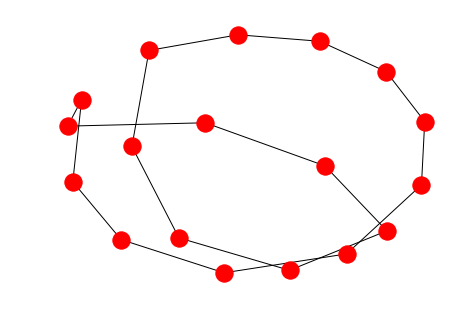

In [17]:
%matplotlib inline
#podemos probar a visualizar uno de los ciclos anteriores, por ejemplo
#obtenemos el subgrafo de los nodos implicados
testfraude = participadasSubGraph.subgraph(fraudlist[53])
nx.draw(testfraude)

In [18]:
#Cogemos el subgrafo anterior y lo salvamos para visualizarlo con Gephi
#h.subgraph(fraudlist[20])
nx.write_gml(h.subgraph(fraudlist[53]),'./Alberto.data/ejemploGephi53.gml')

In [ ]:
lista = [v for u,v,d in participadasSubGraph.edges_iter(data=True) if d['edgetype'] =='PARTICIPADA']

In [ ]:
#nodosEmpresa = filter(lambda (n, d): d['nodetype'] == 'accionistas', g.nodes(data=True))
dd = set(n for n,d in g.nodes_iter(data=True) if d['nodetype']=='empresa')
    


In [ ]:
#g.node['B90186883']
nx.nodes(g)
#from operator import itemgetter
#sorted(g.degree_iter(),key=itemgetter(1),reverse=True)

/home/ec2-user/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/ec2-user/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/ec2-user/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/ec2-user/anaconda2/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axe

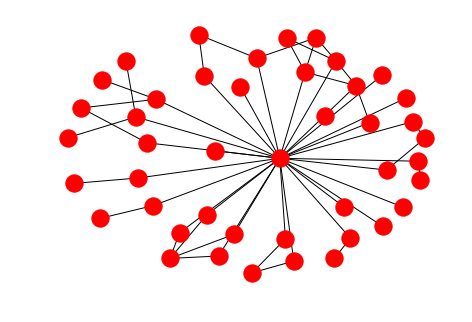

In [3]:
#i=h.node['B36052876']
%matplotlib inline
gg = nx.single_source_shortest_path_length(h ,source='B36052876', cutoff=2)
nx.draw(h.subgraph(gg))
#Cargar un grafo y filtrar por atributos. Obtener grafo solamente de empresas con participadas. 

#con la lista de nodos, obtener el subgrafo.

#filtrar aquellas que 

In [4]:
import networkx as nx
nx.write_gpickle(gg, './Alberto.data/visualizacion.gpickle')

In [ ]:
#Exportacion de variables para construir en networkx el grafo.

import json
#h.subgraph(gg).edges(data=True)
json.dumps(h.subgraph(gg).nodes(data=True))
json.dumps(h.subgraph(gg).edges(data=True))